In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import re
import datetime
from pandas_datareader import data
import utils as utils

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
#The start and end dates for the stock data, similar to the data available for DJIA News Dataset
start = datetime.datetime(2008, 8, 8)
end = datetime.datetime(2016, 5, 1)

## Google Stock

In [0]:
#Getting google stock data
google_stock_df = utils.get_sequential_stock_data(start, end,  "GOOG")

In [4]:
google_stock_df.head()

,High,Low,Open,Close,Volume,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_20,week_21,week_22,week_23,week_24,...,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-08-08,246.949371,236.956833,239.178497,246.580750,7506500.0,False,False,False,False,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2008-08-11,253.489853,244.971786,245.315491,249.484863,8510300.0,False,False,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2008-08-12,252.119995,248.070175,250.062698,250.366562,5532000.0,False,False,False,False,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2008-08-13,250.829834,246.017868,249.863449,249.081375,7278100.0,False,False,False,False,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2008-08-14,252.857224,247.218369,247.920731,251.801193,5859000.0,False,False,False,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Predictions for next day

In [0]:
# Getting features
X_next_day = google_stock_df

#Getting the target variables for next day
y_next_day = utils.get_stock_labels(start, end, "GOOG", 0.5, n_labels = 3, shift = 1)

# Remove the last row as we do not have y labels for that row
X_next_day = X_next_day.drop(X_next_day.tail(1).index)

#Scaling data
scaler = MinMaxScaler()
X_next_day = scaler.fit_transform(X_next_day)

#Splitting data in into train and test
split = int(0.8*len(X_next_day))
X_train = X_next_day[:split]
y_train = y_next_day[:split]
X_test = X_next_day[split:]
y_test = y_next_day[split:]

##### Random Forest

In [6]:
# Fitting a Random forest classifier
rfc_next_day = RandomForestClassifier(n_estimators=1000)
rfc_next_day.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 score: 1.000





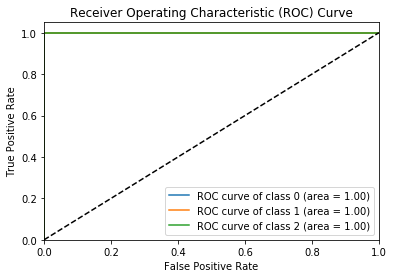

In [7]:
# Checking results on test data
y_pred = rfc_next_day.predict(X_train)
y_prob = rfc_next_day.predict_proba(X_train)
utils.print_metrics(y_train, y_pred, y_prob, 'rfc_train.png')

Accuracy: 0.362
Precision: 0.362
Recall: 0.362
F1 score: 0.362





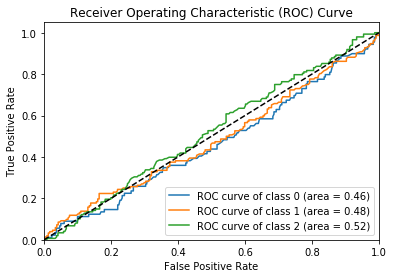

In [8]:
# Checking results on test data
y_pred = rfc_next_day.predict(X_test)
y_prob = rfc_next_day.predict_proba(X_test)
utils.print_metrics(y_test, y_pred, y_prob, 'rfc_test.png')

##### Decision Tree

In [9]:
# Training a Decision tree Classifier
dtc_next_day = DecisionTreeClassifier()
dtc_next_day.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 score: 1.000





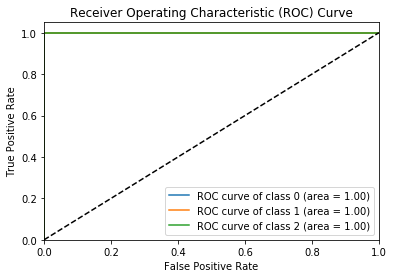

In [10]:
# Checking results on test data
y_pred = dtc_next_day.predict(X_train)
y_prob = dtc_next_day.predict_proba(X_train)
utils.print_metrics(y_train, y_pred, y_prob, 'dtc_train.png')

Accuracy: 0.373
Precision: 0.373
Recall: 0.373
F1 score: 0.373





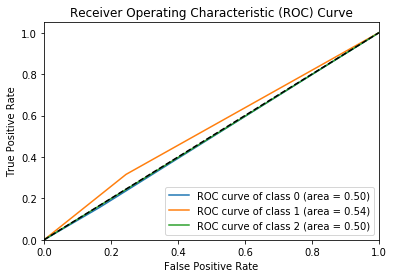

In [11]:
# Checking results on test data
y_pred = dtc_next_day.predict(X_test)
y_prob = dtc_next_day.predict_proba(X_test)
utils.print_metrics(y_test, y_pred, y_prob, 'dtc_test.png')

##### Neural Network

In [0]:
y_train_matrix = to_categorical(y_train)
y_test_matrix = to_categorical(y_test)

In [0]:
# Building a neural network model
model_next_day = Sequential()

model_next_day.add(Dense(units = 2048, activation='relu'))
model_next_day.add(Dense(units=2048, activation='relu'))
model_next_day.add(Dropout(0.2))

model_next_day.add(Dense(units=1024, activation='tanh'))
model_next_day.add(Dense(units=1024, activation='tanh'))
model_next_day.add(Dropout(0.4))

model_next_day.add(Dense(units=512, activation='relu'))
model_next_day.add(Dense(units=512, activation='relu'))
model_next_day.add(Dropout(0.2))

model_next_day.add(Dense(units=256, activation='tanh'))
model_next_day.add(Dense(units=256, activation='tanh'))
model_next_day.add(Dropout(0.4))

model_next_day.add(Dense(3, activation='softmax'))

In [0]:
model_next_day.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
model_next_day.fit(X_train, y_train_matrix, batch_size=32, epochs=10)

Epoch 1/10
1555/1555 [==============================] - 9s 6ms/step - loss: 1.1200 - acc: 0.3666
Epoch 2/10
1555/1555 [==============================] - 7s 5ms/step - loss: 1.0701 - acc: 0.3768
Epoch 3/10
1555/1555 [==============================] - 7s 5ms/step - loss: 1.0562 - acc: 0.4257
Epoch 4/10
1555/1555 [==============================] - 7s 5ms/step - loss: 1.0300 - acc: 0.4521
Epoch 5/10
1555/1555 [==============================] - 8s 5ms/step - loss: 1.0216 - acc: 0.4547
Epoch 6/10
1555/1555 [==============================] - 8s 5ms/step - loss: 0.9933 - acc: 0.4997
Epoch 7/10
1555/1555 [==============================] - 8s 5ms/step - loss: 0.9629 - acc: 0.5164
Epoch 8/10
1555/1555 [==============================] - 8s 5ms/step - loss: 0.9439 - acc: 0.5357
Epoch 9/10
1555/1555 [==============================] - 7s 5ms/step - loss: 0.9060 - acc: 0.5723
Epoch 10/10
1555/1555 [==============================] - 8s 5ms/step - loss: 0.8798 - acc: 0.5756


Accuracy: 0.672
Precision: 0.672
Recall: 0.672
F1 score: 0.672





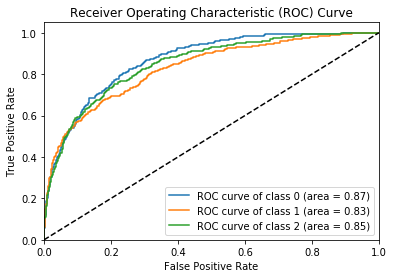

In [19]:
# Checking results on test data
y_pred = model_next_day.predict_classes(X_train)
y_prob = model_next_day.predict(X_train)
utils.print_metrics(y_train, y_pred, y_prob, 'nn_train')

Accuracy: 0.380
Precision: 0.380
Recall: 0.380
F1 score: 0.380





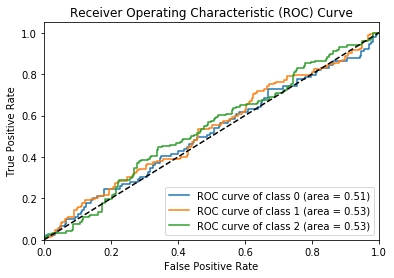

In [20]:
# Checking results on test data
y_pred = model_next_day.predict_classes(X_test)
y_prob = model_next_day.predict(X_test)
utils.print_metrics(y_test, y_pred, y_prob, 'nn_test')